In [137]:
import rosbag
from geometry_msgs.msg import Vector3
import rospy

bag = rosbag.Bag('/home/miguel/catkin_ws/src/crazyflie/crazyflie_controller/src/data/data_record.bag')

import matplotlib.pyplot as plt

position_optitrack = []
position_state_estimate = []
vel_optitrack = []
vel_state_estimate = []
position_gaussian_error = []

for topic, msg, t in bag.read_messages(topics=['position_Optitrack', 'position_estimate_topic', 'vel_Optitrack', 'vel_estimate_topic', 'position_gaussian_error']):
    
    if topic == 'position_Optitrack':
        position_optitrack.append((msg.x, msg.y, msg.z))

    if topic == 'position_estimate_topic':
        position_state_estimate.append((msg.x, msg.y, msg.z))

    if topic == 'vel_Optitrack':
        vel_optitrack.append((msg.x, msg.y, msg.z))

    if topic == 'vel_estimate_topic':
        vel_state_estimate.append((msg.x, msg.y, msg.z))

    if topic == 'position_gaussian_error':
        position_gaussian_error.append((msg.x, msg.y, msg.z))

# After processing, close the bag
bag.close()


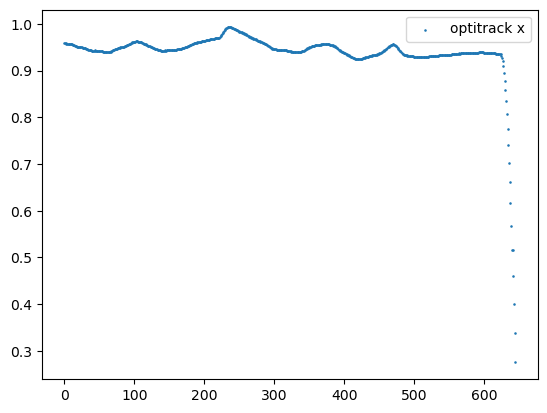

In [138]:
# Plotting example
plt.scatter(range(len(position_optitrack)), [x[2] for x in position_optitrack], label='optitrack x', s=0.7)
# plt.scatter(range(len(position_state_estimate)), [x[2] for x in position_state_estimate], label='kalman x', s=0.7)
# Add more plots as needed
plt.legend()
plt.show()

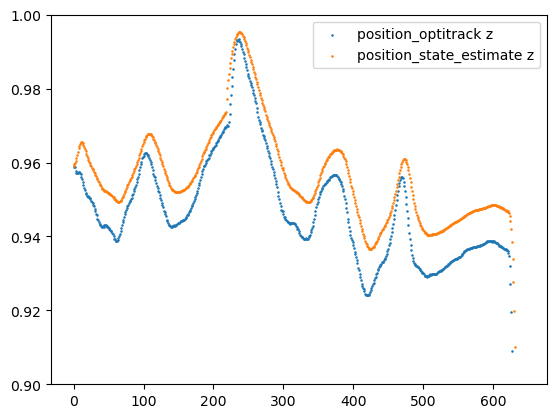

In [150]:
# Plotting example
plt.scatter(range(len(position_optitrack)), [x[2] for x in position_optitrack], label='position_optitrack z', s=0.7)
plt.scatter(range(len(position_state_estimate)), [x[2] for x in position_state_estimate], label='position_state_estimate z', s=0.7)
# plt.scatter(range(len(position_gaussian_error)), [x[2] for x in position_gaussian_error], label='position_gaussian_error x', s=0.7)
# Add more plots as needed
plt.ylim(0.9, 1)
plt.legend()
plt.show()

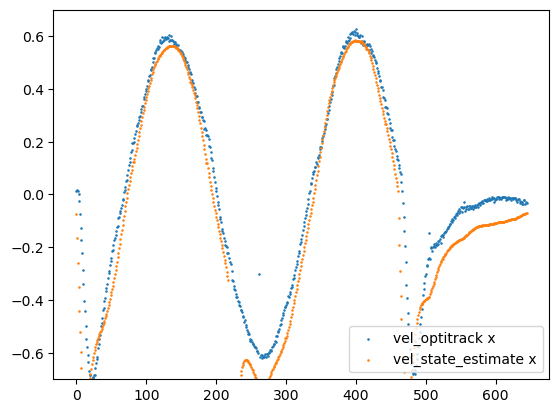

In [151]:
# Plotting example
plt.scatter(range(len(vel_optitrack)), [x[1] for x in vel_optitrack], label='vel_optitrack x', s=0.7)
plt.scatter(range(len(vel_state_estimate)), [x[1] for x in vel_state_estimate], label='vel_state_estimate x', s=0.7)
plt.ylim(-0.7, 0.7)
# Add more plots as needed
plt.legend()
plt.show()


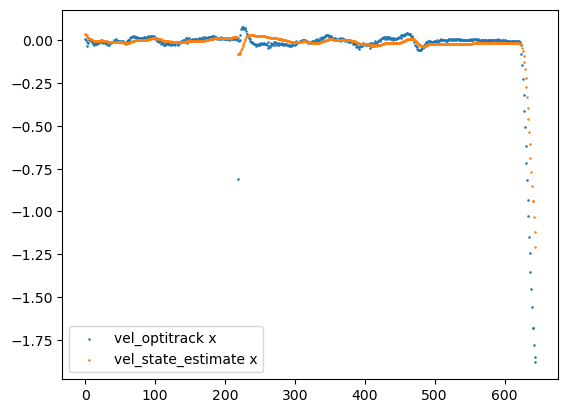

In [145]:
# Plotting example
plt.scatter(range(len(vel_optitrack)), [x[2] for x in vel_optitrack], label='vel_optitrack x', s=0.7)
plt.scatter(range(len(vel_state_estimate)), [(-x[2]+0.05) for x in vel_state_estimate], label='vel_state_estimate x', s=0.7)
# Add more plots as needed
plt.legend()
plt.show()

In [142]:
import numpy as np
print(np.array(vel_state_estimate)[100:110, 2])
print(np.array(vel_optitrack)[100:110, 2])
np.array(0.01**2 * np.eye(3))


[0.03654159 0.03652396 0.037057   0.03841221 0.0396492  0.04089962
 0.0423743  0.04330972 0.04427841 0.04619214]
[ 0.0108958   0.01378606  0.00789788 -0.00111529 -0.00226737 -0.00452927
 -0.00876106 -0.00610898 -0.00886868 -0.01931236]


array([[0.0001, 0.    , 0.    ],
       [0.    , 0.0001, 0.    ],
       [0.    , 0.    , 0.0001]])